<a href="https://www.kaggle.com/code/kparthiban007/mobile-device-analysis?scriptVersionId=214882983" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Mobile Device Usage & Battery Draining</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [3]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
numeric_columns = df.select_dtypes(include='int64').columns
numeric_columns

Index(['User ID', 'App Usage Time (min/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age',
       'User Behavior Class'],
      dtype='object')

<div style="background-color:#F5F5BC; color:#FF7F50; font-size:25px; padding:15px; text-align:center; border-radius:15px;">Data Analysis</div>

In [6]:
i =0 
def app_usage_plot(col):
    global i
    i+=1
    plt.subplot(3,1,i)
    sns.scatterplot(
    data=df,
    x='App Usage Time (min/day)', 
    y=col, 
    hue='User Behavior Class', 
    palette='Set3'
    )
    plt.title(f'App Usage Time vs {col}')
    plt.xlabel('App Usage Time (min/day)')
    plt.ylabel(col)


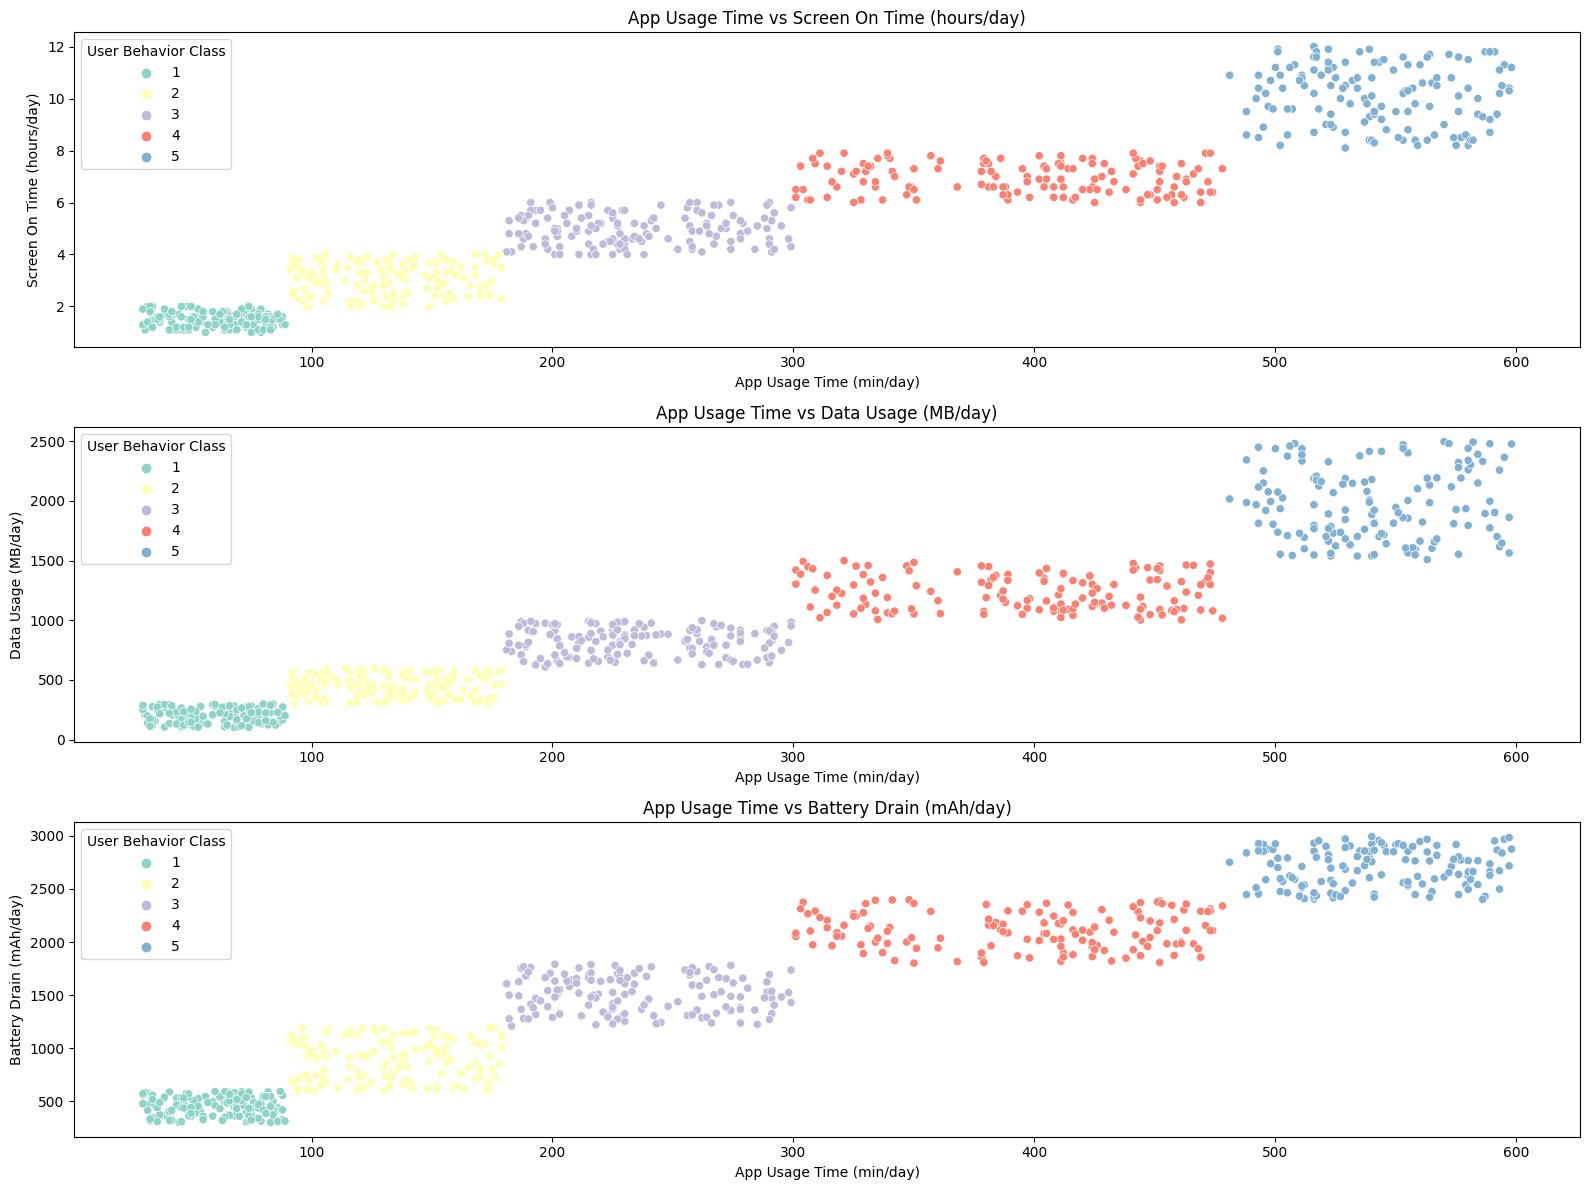

In [7]:
plt.figure(figsize=(16, 12))

app_usage_plot('Screen On Time (hours/day)')
app_usage_plot('Data Usage (MB/day)')
app_usage_plot('Battery Drain (mAh/day)')

plt.tight_layout()  
plt.show()  

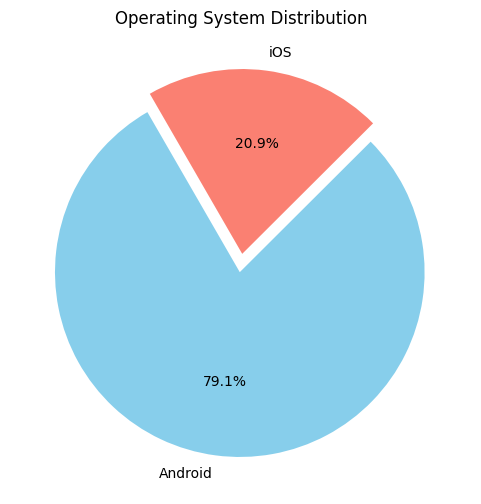

In [8]:
plt.figure(figsize=(6, 6))
df['Operating System'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'] ,startangle=120,explode=[0.05, 0.05])
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()

<Axes: xlabel='User Behavior Class', ylabel='count'>

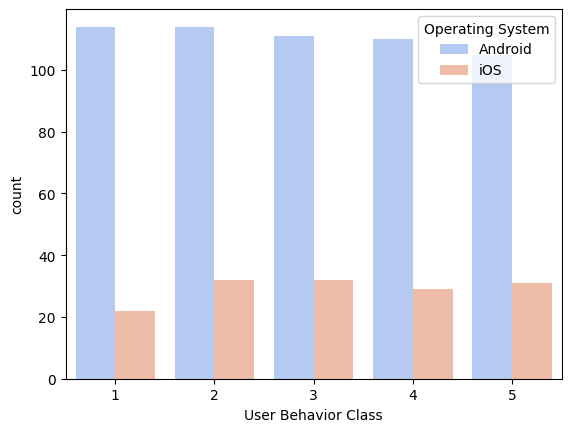

In [9]:
sns.countplot(x=df['User Behavior Class'],hue=df['Operating System'], palette='coolwarm')

<Axes: xlabel='User Behavior Class', ylabel='count'>

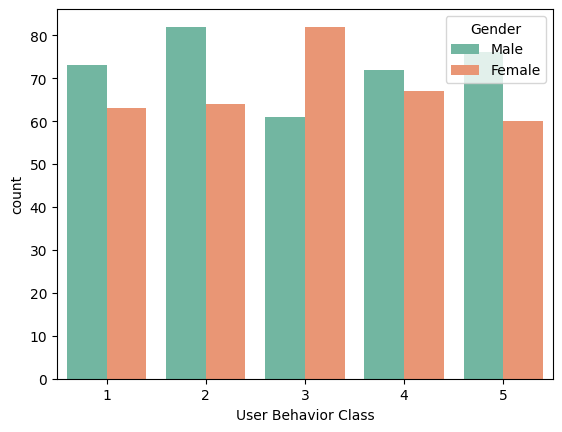

In [10]:
sns.countplot(x=df['User Behavior Class'],hue=df['Gender'],palette='Set2')

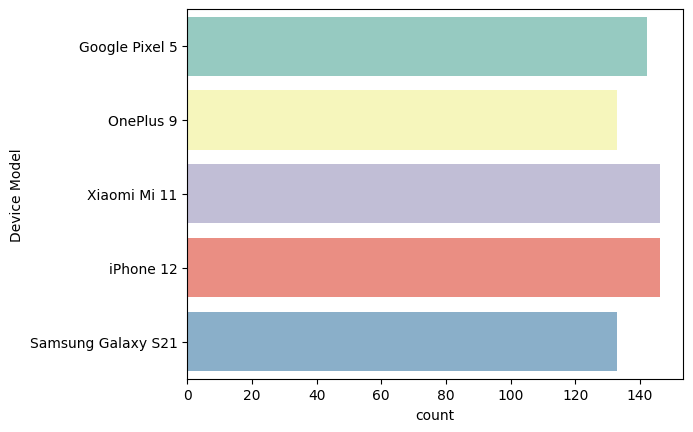

In [11]:
sns.countplot(y=df['Device Model'],palette='Set3')
plt.show()

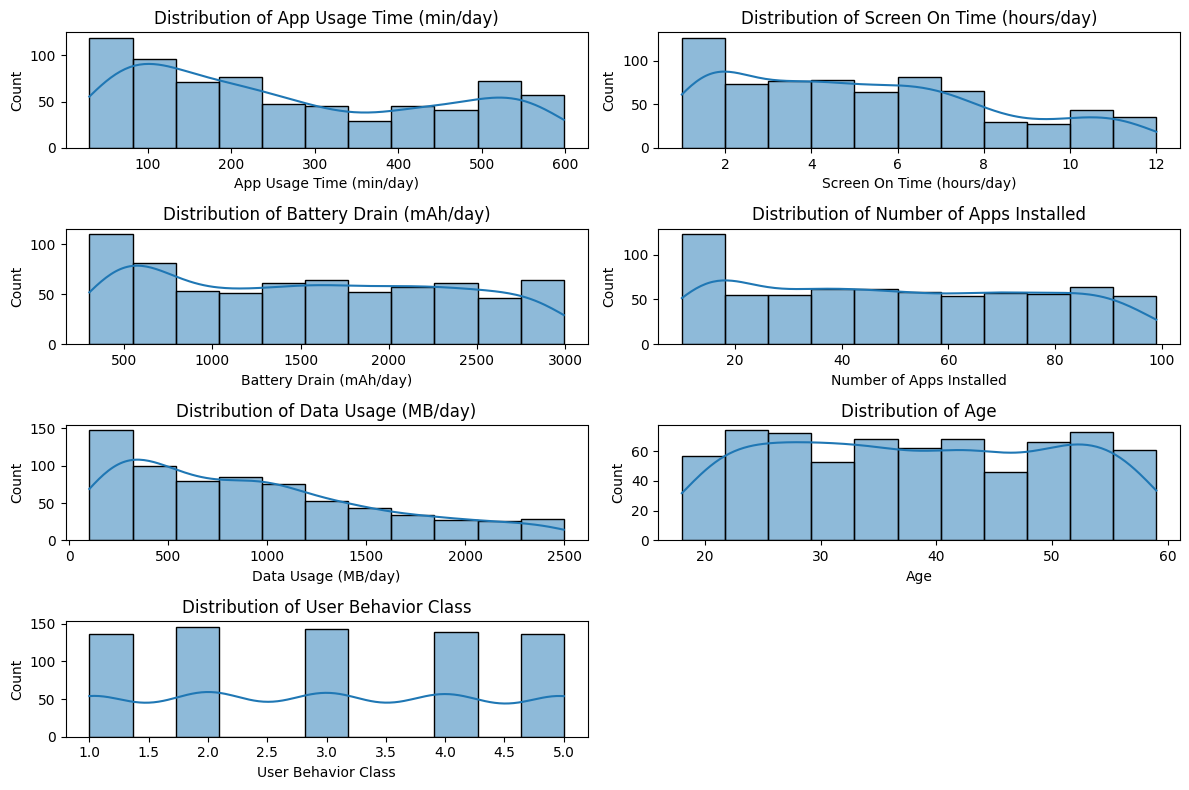

In [12]:

plt.figure(figsize=(12,8))
i = 0
def hist_plot(col):
    global i
    i+=1
    plt.subplot(4,2,i)
    sns.histplot(x=df[col],kde= True)
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")
numeric_columns = [ 'App Usage Time (min/day)','Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age',
       'User Behavior Class']
for col in numeric_columns:
    hist_plot(col)

plt.tight_layout()
plt.show()   

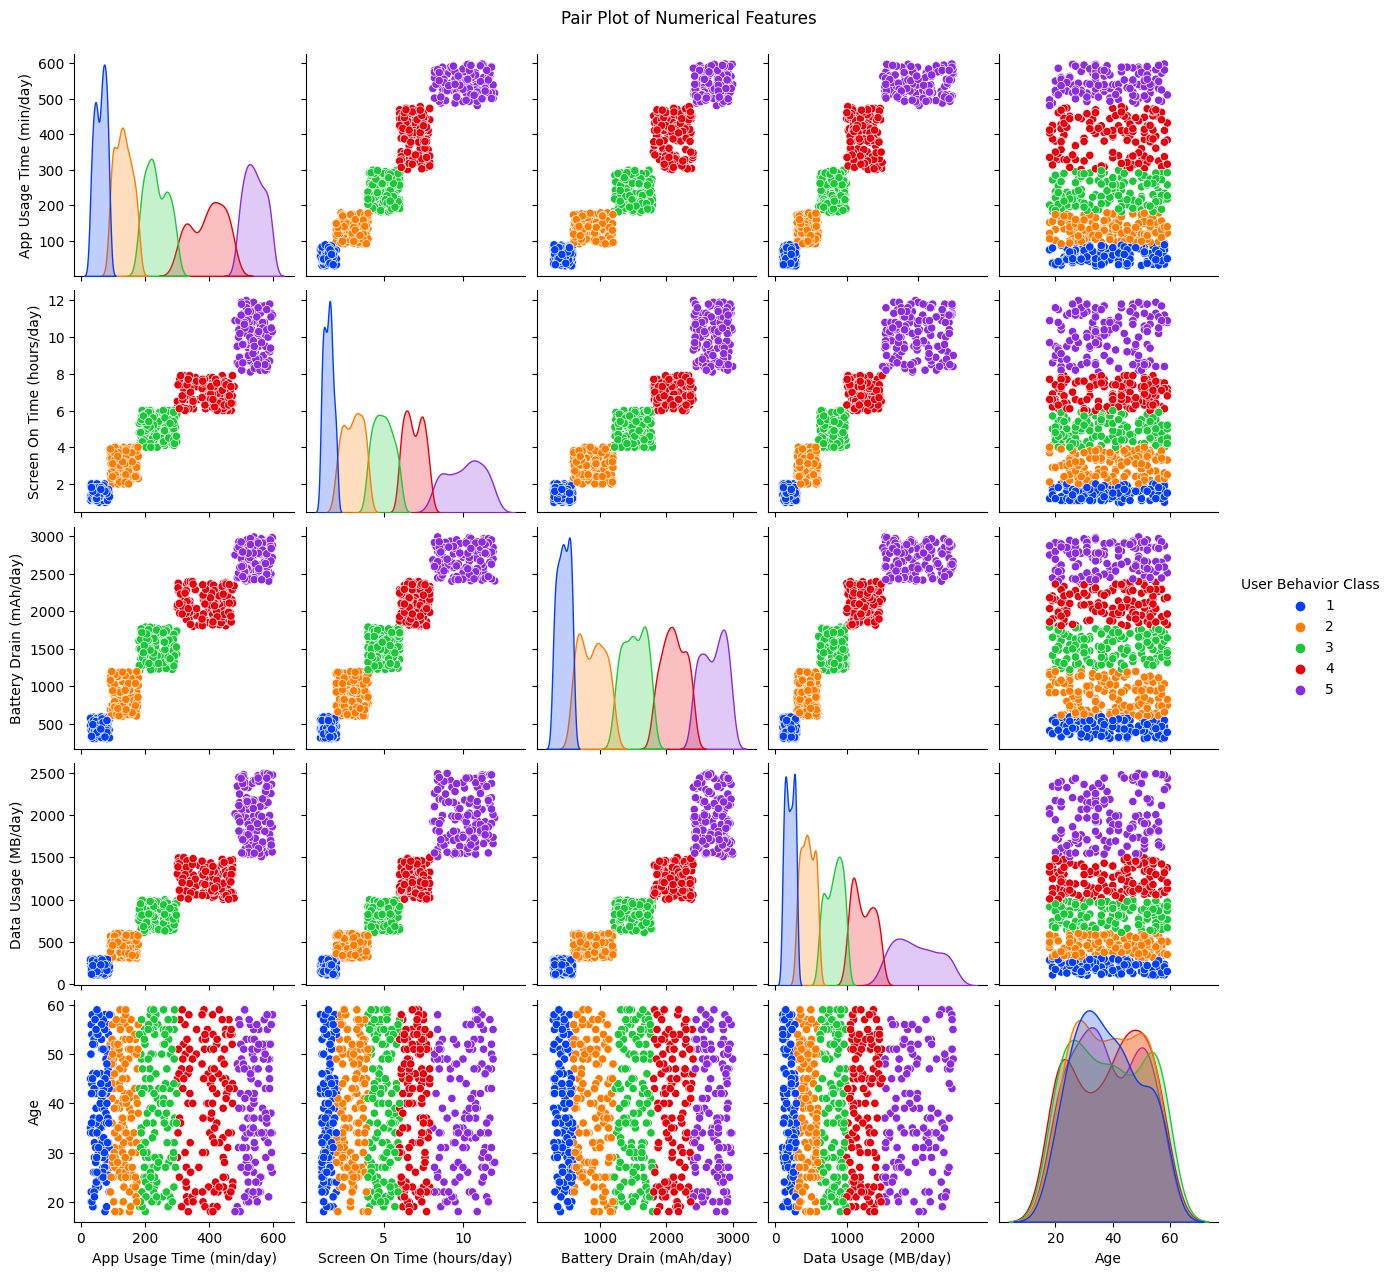

In [13]:
sns.pairplot(df, vars=['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age'], hue='User Behavior Class', palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


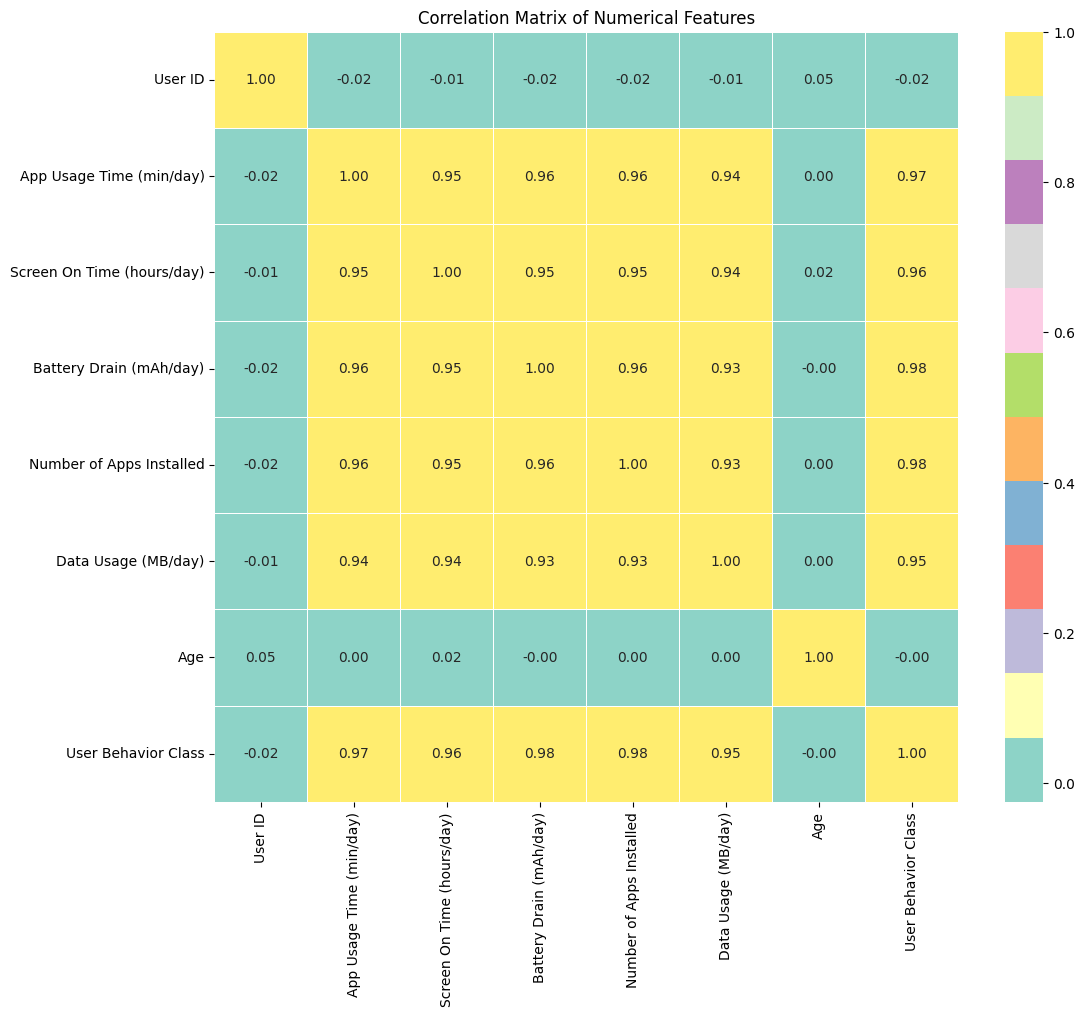

In [14]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Set3', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()